In [1]:
# Gerekli kütüphaneleri ekleme:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veri setini indirip ekleme:
data = pd.read_excel("https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1")

In [3]:
# Veri setinin ilk 5 elemanını ekranda görüntüleme:
data.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [4]:
# Anlamsız veri içeren ilk sütunu silme:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
# Veri setinin boyutunu inceleme:
data.shape

(191, 5)

In [6]:
# Veri setinin tanımlayıcı istatistik özetini inceleme:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiyat,191.0,649.476440,111.064174,450.0,575.0,650.0,700.0,1175.0
Oda_Sayısı,191.0,2.340314,0.721401,1.0,2.0,2.0,3.0,3.0
Net_m2,191.0,85.183246,16.482620,40.0,80.0,90.0,95.0,125.0
Katı,191.0,3.931937,3.752974,0.0,0.0,3.0,7.0,11.0
Yaşı,191.0,12.753927,8.374596,0.0,4.0,16.0,20.0,24.0


In [7]:
# Veri setinde eksik veri olup olmadığını inceleme:
data.isnull().any()

Fiyat         False
Oda_Sayısı    False
Net_m2        False
Katı          False
Yaşı          False
dtype: bool

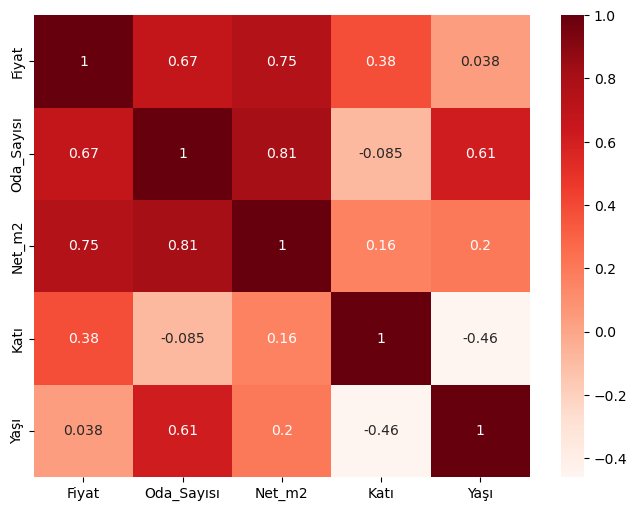

In [8]:
# Veri setindeki tüm değişkenlerin kendi aralarındaki korelasyonlarını görselleştirme:
plt.figure(figsize=(8, 6))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

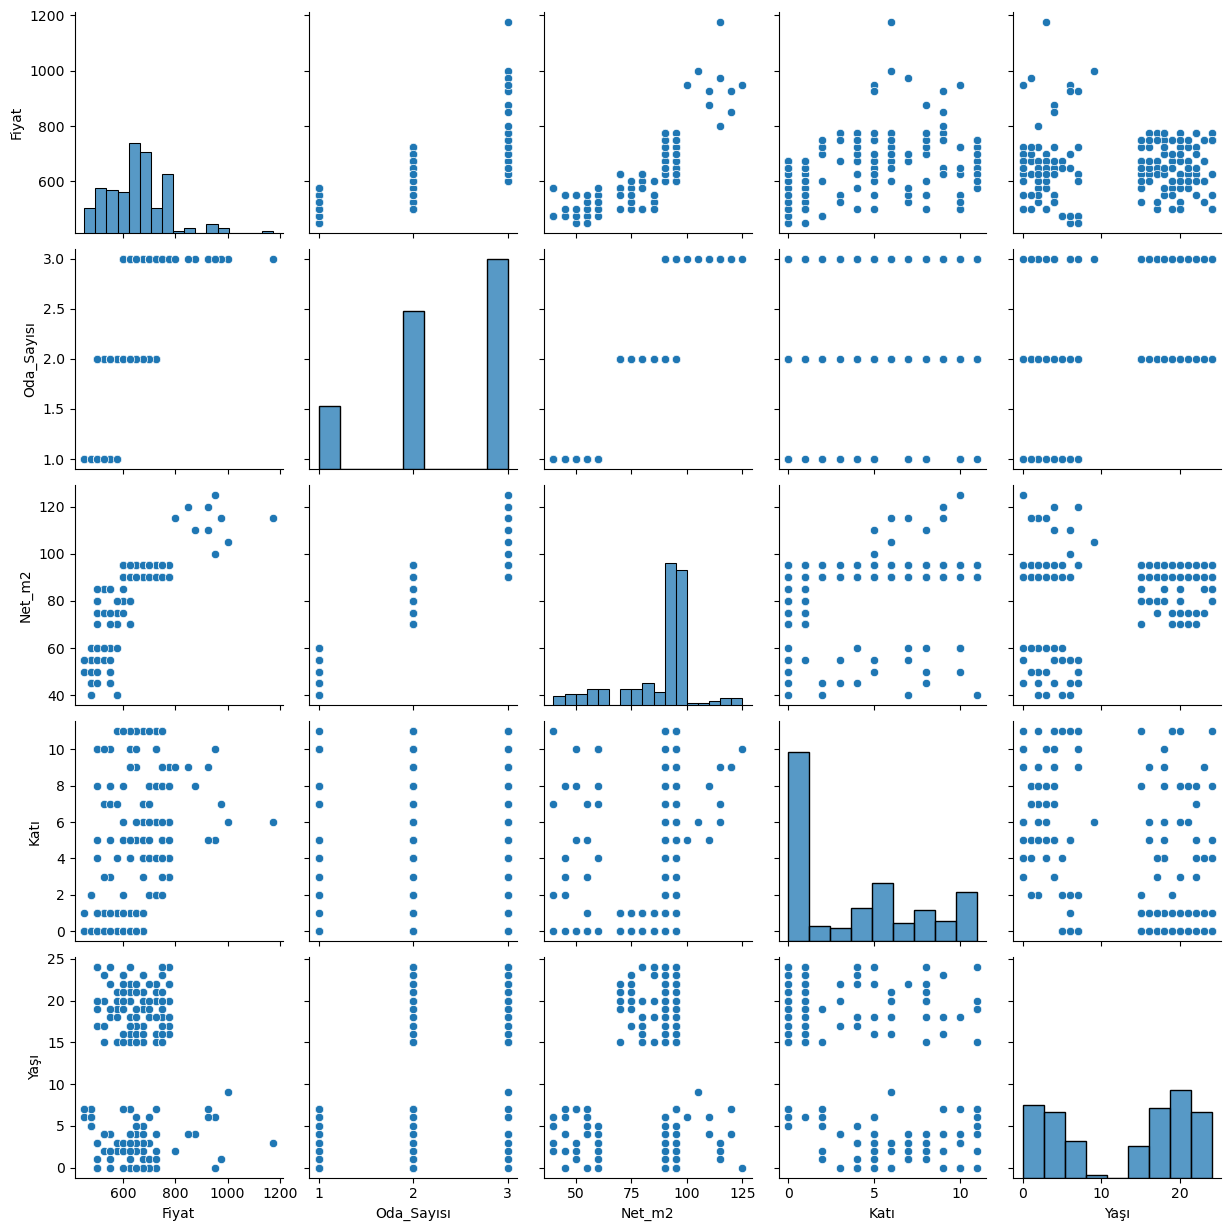

In [9]:
# Tüm değişkenlerin birbirleri ile olan ilişkilerini serpilme grafikleri ile görselleştirme:
sns.pairplot(data)

<Axes: xlabel='Fiyat', ylabel='Density'>

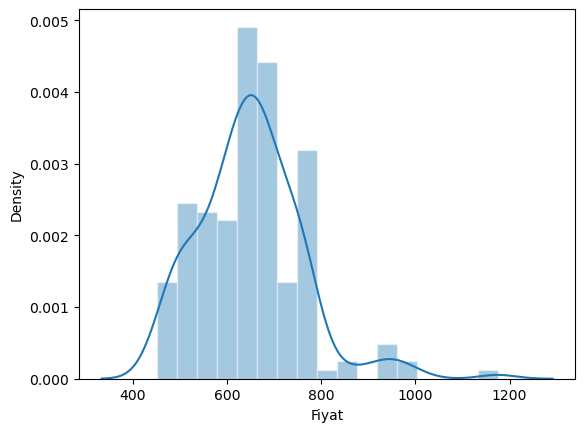

In [10]:
# Hedef değişkenin dağılımını görselleştirme:
sns.histplot(data["Fiyat"], kde=True, stat="density", kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1, 1, 1, 0.4))

In [11]:
# Hedef ve öznitelik değişkenlerini tanımlama:
X = data[["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"]]
y = data["Fiyat"]

In [12]:
# Veri setini rassal olarak eğitim ve test veri seti şeklinde ikiye bölümleme:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Çoklu lineer regresyon modelinin eğitimi:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train.values, y_train)

LinearRegression()

In [14]:
# Modelin kesim parametresini elde etme:
lr_model.intercept_

305.1625895287756

In [15]:
# Modelin eğim parametrelerini elde etme:
coefficient_df = pd.DataFrame(lr_model.coef_, X.columns, columns=["Linear Regression Feature Coefficients"])
coefficient_df

,Linear Regression Feature Coefficients
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


In [16]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_train_predicted = lr_model.predict(X_train.values)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺551.96, Actual price: ₺525.00
Predicted price: ₺686.31, Actual price: ₺650.00
Predicted price: ₺531.30, Actual price: ₺550.00
Predicted price: ₺694.64, Actual price: ₺675.00
Predicted price: ₺675.66, Actual price: ₺675.00
Predicted price: ₺698.38, Actual price: ₺625.00
Predicted price: ₺558.29, Actual price: ₺575.00
Predicted price: ₺678.21, Actual price: ₺650.00
Predicted price: ₺546.29, Actual price: ₺600.00
Predicted price: ₺680.84, Actual price: ₺775.00
Predicted price: ₺845.06, Actual price: ₺800.00
Predicted price: ₺546.29, Actual price: ₺500.00
Predicted price: ₺746.94, Actual price: ₺725.00
Predicted price: ₺562.47, Actual price: ₺550.00
Predicted price: ₺553.19, Actual price: ₺625.00
Predicted price: ₺693.21, Actual price: ₺650.00
Predicted price: ₺533.30, Actual price: ₺500.00
Predicted price: ₺688.54, Actual price: ₺675.00
Predicted price: ₺668.88, Actual price: ₺625.00
Predicted price: ₺548.47, Actual price: ₺500.00
Predicted price: ₺564.96, Actual price: 

In [17]:
# Çoklu lineer regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
from sklearn.metrics import r2_score
print("R2 for linear regression model over train set:", r2_score(y_train, y_train_predicted))

R2 for linear regression model over train set: 0.733739961656849


In [18]:
# Test veri seti tahmini veya örneklem-dışı tahmin (out-of-sample prediction):
# Test setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_test_predicted = lr_model.predict(X_test.values)
for i, prediction in enumerate(y_test_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_test[y_test.index[i]]))

Predicted price: ₺706.60, Actual price: ₺775.00
Predicted price: ₺654.37, Actual price: ₺600.00
Predicted price: ₺747.75, Actual price: ₺750.00
Predicted price: ₺692.29, Actual price: ₺700.00
Predicted price: ₺720.48, Actual price: ₺625.00
Predicted price: ₺537.57, Actual price: ₺575.00
Predicted price: ₺459.70, Actual price: ₺475.00
Predicted price: ₺521.32, Actual price: ₺500.00
Predicted price: ₺669.88, Actual price: ₺650.00
Predicted price: ₺686.31, Actual price: ₺600.00
Predicted price: ₺682.88, Actual price: ₺625.00
Predicted price: ₺720.79, Actual price: ₺775.00
Predicted price: ₺488.46, Actual price: ₺525.00
Predicted price: ₺725.65, Actual price: ₺750.00
Predicted price: ₺686.31, Actual price: ₺650.00
Predicted price: ₺781.01, Actual price: ₺950.00
Predicted price: ₺725.65, Actual price: ₺775.00
Predicted price: ₺696.95, Actual price: ₺725.00
Predicted price: ₺716.93, Actual price: ₺750.00
Predicted price: ₺518.53, Actual price: ₺625.00
Predicted price: ₺540.63, Actual price: 

In [19]:
# Çoklu lineer regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for linear regression model over test set:", r2_score(y_test, y_test_predicted))

R2 for linear regression model over test set: 0.6987282352837991


**Yorum**: Eğitim veri seti üzerinden eğitilen model eğitim veri setindeki hedef değişkeni %73 oranında öngörebilirken test veri setindeki öznitelik değişkenlerini kullanarak %69 oranında doğru tahmin edebilmektedir. Modelin test seti üzerindeki performansı pratik bir kurala göre fena değildir. Uygulama tecrübelerinden elde edilen bu kural ise şu şekildedir:
- %70-80 : Fena değil
- %80-90 : İyi
- %90-100: Çok iyi

In [20]:
# 3 odalı, 8 yıllık bir binanın 4.katında bulunan net 105 m^2 kullanım alanına sahip bir dairenin fiyatını tahmin etme:
room_number = 3
net_m2 = 105
floor = 4
age = 8
test_apartment = np.array([[room_number, net_m2, floor, age]])
predicted_price = lr_model.predict(test_apartment)[0]
print("The predicted price of the desired apartment: ₺%.2f" % predicted_price)

The predicted price of the desired apartment: ₺770.25


In [21]:
# LASSO regresyon modelinin eğitimi:
from sklearn.linear_model import Lasso
lasso_model_1 = Lasso(alpha=1) # Regularization strength is chosen as 1.
lasso_model_1.fit(X_train.values, y_train)

Lasso(alpha=1)

In [22]:
# LASSO regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over train set:", r2_score(y_train, lasso_model_1.predict(X_train.values)))

# LASSO regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over test set:", r2_score(y_test, lasso_model_1.predict(X_test.values)))

# LASSO regresyonunda kullanılan, ağırlığı sıfır olmayan öznitelik sayısını bulma:
print("Number of features used and whose weight is not zero:", np.sum(lasso_model_1.coef_!=0))

R2 for LASSO regression model over train set: 0.7324650909211012
R2 for LASSO regression model over test set: 0.6862906745619393
Number of features used and whose weight is not zero: 4


In [23]:
# LASSO regresyon modelinin eğitimi:
from sklearn.linear_model import Lasso
lasso_model_001 = Lasso(alpha=0.001) # Regularization strength is chosen as 0.001.
lasso_model_001.fit(X_train.values, y_train)

Lasso(alpha=0.001)

In [24]:
# LASSO regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over train set:", r2_score(y_train, lasso_model_001.predict(X_train.values)))

# LASSO regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for LASSO regression model over test set:", r2_score(y_test, lasso_model_001.predict(X_test.values)))

# LASSO regresyonunda kullanılan, ağırlığı sıfır olmayan öznitelik sayısını bulma:
print("Number of features used and whose weight is not zero:", np.sum(lasso_model_001.coef_!=0))

R2 for LASSO regression model over train set: 0.7337399603541521
R2 for LASSO regression model over test set: 0.6987168382749436
Number of features used and whose weight is not zero: 4


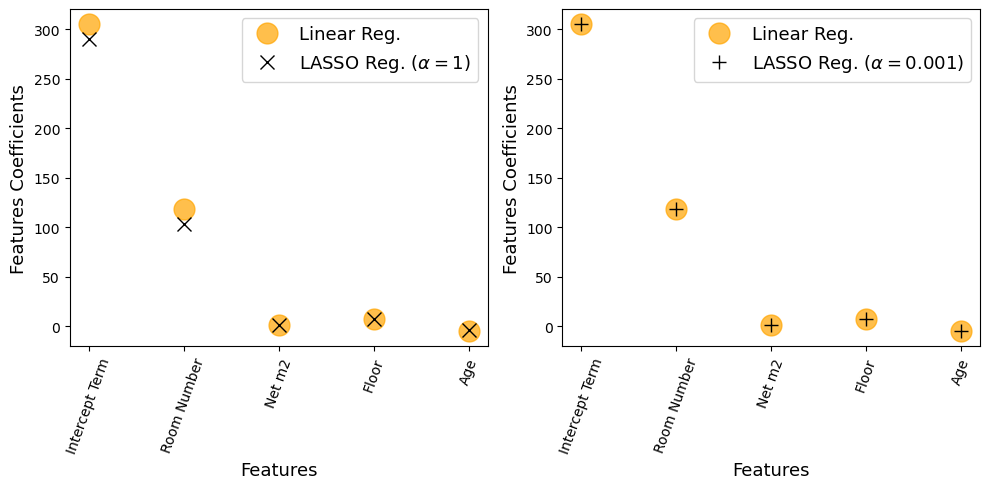

In [25]:
# LASSO regresyonu ile çoklu lineer regresyon modelinin grafiksel karşılaştırılması:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), lasso_model_1.coef_, alpha=1, linestyle="none", marker="x", markersize=10, color="black",
         label=r"LASSO Reg. ($\alpha=1$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, lasso_model_1.intercept_, alpha=1, linestyle="none", marker="x", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.subplot(1, 2, 2)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), lasso_model_001.coef_, alpha=1, linestyle="none", marker="+", markersize=10, color="black",
         label=r"LASSO Reg. ($\alpha=0.001$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, lasso_model_001.intercept_, alpha=1, linestyle="none", marker="+", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()

In [26]:
# LASSO regresyonları ile çoklu lineer regresyon modelinin öznitelik katsayılarının karşılaştırılması:
coefficient_df = pd.DataFrame(data=[lr_model.coef_, lasso_model_1.coef_, lasso_model_001.coef_],
                               columns=X.columns,
                               index=[r"Linear Regression", r"LASSO Regression ($\alpha=1$)", r"LASSO Regression ($\alpha=0.001$)"])
coefficient_df.T

,Linear Regression,LASSO Regression ($\alpha=1$),LASSO Regression ($\alpha=0.001$)
Oda_Sayısı,118.350670,103.407284,118.335562
Net_m2,1.133092,1.619248,1.133583
Katı,7.096886,7.086422,7.096878
Yaşı,-4.665706,-4.055176,-4.665089


**Yorum**: LASSO modeli dört öznitelik değişkeninin dördünü de model oluşturma da kullanmıştır, yani modelin hedef değişkeni öngörmede gereksiz görüp attığı bir değişken bulunmamaktadır. L1 regularization katsayı (alpha parametresi) sıfıra yaklaştıkça LASSO ile oluşturulan modelin tahmin parametreleri çoklu doğrusal regresyonun oluşturduğu tahmin parametrelerine yaklaşmaktadır. Alpha değeri arttıkça bazı parametre katsayılarında gözle görülür sıkışmalar (azalmalar) meydana gelmiştir. Örneğin, oda sayısı ve modelin sabit terimi için elde edilen katsayılarda bu durum söz konusudur.

In [27]:
# RIDGE regresyon modelinin eğitimi:
from sklearn.linear_model import Ridge
ridge_model_100 = Ridge(alpha=100) # Regularization strength is chosen as 100.
ridge_model_100.fit(X_train.values, y_train)

Ridge(alpha=100)

In [28]:
# RIDGE regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over train set:", r2_score(y_train, ridge_model_100.predict(X_train.values)))

# RIDGE regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over test set:", r2_score(y_test, ridge_model_100.predict(X_test.values)))

R2 for RIDGE regression model over train set: 0.6682250934479661
R2 for RIDGE regression model over test set: 0.5584311823011989


In [29]:
# RIDGE regresyon modelinin eğitimi:
from sklearn.linear_model import Ridge
ridge_model_01 = Ridge(alpha=0.01) # Regularization strength is chosen as 0.01.
ridge_model_01.fit(X_train.values, y_train)

Ridge(alpha=0.01)

In [30]:
# RIDGE regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over train set:", r2_score(y_train, ridge_model_01.predict(X_train.values)))

# RIDGE regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for RIDGE regression model over test set:", r2_score(y_test, ridge_model_01.predict(X_test.values)))

R2 for RIDGE regression model over train set: 0.7337398851682211
R2 for RIDGE regression model over test set: 0.698643301640363


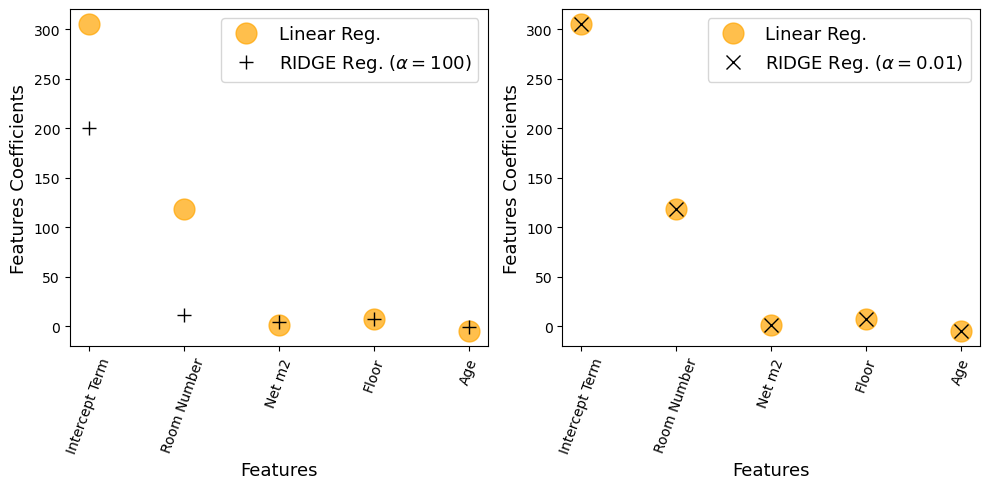

In [31]:
# RIDGE regresyonu ile çoklu lineer regresyon modelinin grafiksel karşılaştırılması:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), ridge_model_100.coef_, alpha=1, linestyle="none", marker="+", markersize=10, color="black",
         label=r"RIDGE Reg. ($\alpha=100$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, ridge_model_100.intercept_, alpha=1, linestyle="none", marker="+", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.subplot(1, 2, 2)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), ridge_model_01.coef_, alpha=1, linestyle="none", marker="x", markersize=10, color="black",
         label=r"RIDGE Reg. ($\alpha=0.01$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, ridge_model_01.intercept_, alpha=1, linestyle="none", marker="x", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()

In [32]:
# RIDGE regresyonları ile çoklu lineer regresyon modelinin öznitelik katsayılarının karşılaştırılması:
coefficient_df = pd.DataFrame(data=[lr_model.coef_, ridge_model_100.coef_, ridge_model_01.coef_],
                               columns=X.columns,
                               index=[r"Linear Regression", r"RIDGE Regression ($\alpha=100$)", r"RIDGE Regression ($\alpha=0.01$)"])
coefficient_df.T

,Linear Regression,RIDGE Regression ($\alpha=100$),RIDGE Regression ($\alpha=0.01$)
Oda_Sayısı,118.350670,11.104787,118.234644
Net_m2,1.133092,4.644286,1.136878
Katı,7.096886,7.093988,7.097311
Yaşı,-4.665706,-0.376032,-4.660976


**Yorum**: RIDGE modelinde, L2 regularization katsayı (alpha parametresi) sıfıra yaklaştıkça RIDGE ile oluşturulan modelin tahmin parametreleri çoklu doğrusal regresyonun oluşturduğu tahmin parametrelerine yaklaşmaktadır. Alpha ne kadar yüksek olursa tahmin parametreleri üzerindeki kısıtlama o kadar fazla olur. Alpha ne kadar düşük olursa o kadar lineer regresyon parametre tahminlerine yaklaşılmış olur. Görüldüğü gibi alpha değeri arttıkça bazı parametre katsayılarında gözle görülür sıkışmalar (azalmalar) meydana gelmiştir. Örneğin, oda sayısı ve modelin sabit terimi için elde edilen katsayılarda bu durum söz konusudur. Bu da oda saysısı özniteliğinin over-fitting nedeni olabileceğini düşündürüyor.

In [33]:
# ElasticNet regresyon modelinin eğitimi:
from sklearn.linear_model import ElasticNet
elasticnet_model_100 = ElasticNet(alpha=100, l1_ratio=0.5)
elasticnet_model_100.fit(X_train.values, y_train)

ElasticNet(alpha=100)

In [34]:
# ElasticNet regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over train set:", r2_score(y_train, elasticnet_model_100.predict(X_train.values)))

# ElasticNet regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over test set:", r2_score(y_test, elasticnet_model_100.predict(X_test.values)))

# ElasticNet regresyonunda kullanılan, ağırlığı sıfır olmayan öznitelik sayısını bulma:
print("Number of features whose weight is not zero:", np.sum(elasticnet_model_100.coef_!=0))

R2 for ElasticNet regression model over train set: 0.5844501052872215
R2 for ElasticNet regression model over test set: 0.47748967369285467
Number of features whose weight is not zero: 3


In [35]:
# ElasticNet regresyon modelinin eğitimi:
from sklearn.linear_model import ElasticNet
elasticnet_model_01 = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet_model_01.fit(X_train.values, y_train)

ElasticNet(alpha=0.01)

In [36]:
# ElasticNet regresyon modelinin R2 ölçütünü hesaplama (eğitim veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over train set:", r2_score(y_train, elasticnet_model_01.predict(X_train.values)))

# ElasticNet regresyon modelinin R2 ölçütünü hesaplama (test veri setinin üzerinden tahmin):
print("R2 for ElasticNet regression model over test set:", r2_score(y_test, elasticnet_model_01.predict(X_test.values)))

# ElasticNet regresyonunda kullanılan, ağırlığı sıfır olmayan öznitelik sayısını bulma:
print("Number of features whose weight is not zero:", np.sum(elasticnet_model_01.coef_!=0))

R2 for ElasticNet regression model over train set: 0.7333501064823666
R2 for ElasticNet regression model over test set: 0.6923107858960038
Number of features whose weight is not zero: 4


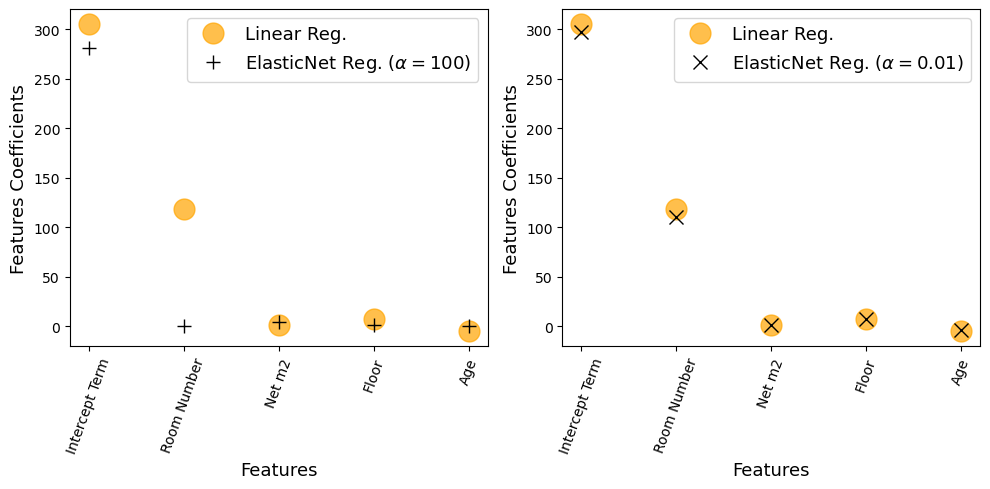

In [37]:
# ElasticNet regresyonu ile çoklu lineer regresyon modelinin grafiksel karşılaştırılması:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), elasticnet_model_100.coef_, alpha=1, linestyle="none", marker="+", markersize=10, color="black",
         label=r"ElasticNet Reg. ($\alpha=100$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, elasticnet_model_100.intercept_, alpha=1, linestyle="none", marker="+", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.subplot(1, 2, 2)
plt.plot((1, 2, 3, 4), lr_model.coef_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange", 
         label="Linear Reg.", zorder=2)
plt.plot((1, 2, 3, 4), elasticnet_model_01.coef_, alpha=1, linestyle="none", marker="x", markersize=10, color="black",
         label=r"ElasticNet Reg. ($\alpha=0.01$)", zorder=7)
plt.plot(0, lr_model.intercept_, alpha=0.7, linestyle="none", marker="o", markersize=15, color="orange")
plt.plot(0, elasticnet_model_01.intercept_, alpha=1, linestyle="none", marker="x", markersize=10, color="black")
plt.xticks([0, 1, 2, 3, 4], ("Intercept Term", "Room Number", "Net m2", "Floor", "Age"), rotation=70)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Features Coefficients", fontsize=13)
plt.legend(fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()

In [38]:
# ElasticNet regresyonları ile çoklu lineer regresyon modelinin öznitelik katsayılarının karşılaştırılması:
coefficient_df = pd.DataFrame(data=[lr_model.coef_, elasticnet_model_100.coef_, elasticnet_model_01.coef_],
                               columns=X.columns,
                               index=[r"Linear Regression", r"ElasticNet Regression ($\alpha=100$)", r"ElasticNet Regression ($\alpha=0.01$)"])
coefficient_df.T

,Linear Regression,ElasticNet Regression ($\alpha=100$),ElasticNet Regression ($\alpha=0.01$)
Oda_Sayısı,118.350670,0.000000,110.067352
Net_m2,1.133092,4.233598,1.403373
Katı,7.096886,0.927409,7.126647
Yaşı,-4.665706,-0.114527,-4.328035


**Yorum**: ElasticNet regresyonunda alpha değeri 100 seçildiğinde modelin özniteliklerinin birisinin (oda sayısı) katsayısı sıfır oldu ve ağırlığı sıfır olmayan öznitelik sayısı üçe düşmüştür. Ancak model RIDGE regression teriminden dolayı tüm öznitelikleri model tahmininde kullanmaya devam etmektedir.